# Discrimination in Tennis: An Examination of Age and Territorial Biases

DSCI 100 \
*Team Members:* Aleyna, Camille, Erik, Yulong

#### *INTRODUCTION*

Tennis has been an integral sport within the world since 1890. Many global tournaments are held each year in major cities such as Melbourn,
Paris, London, and New York City, with prize pools of over 50 million! Given this sport with such historical value and a global presence, 
we wanted to explore any **potential biases** through **age** or **country of origin** within the international tennis community. We achieve this by
examining a dataset of the top 500 tennis players in the world, and visualizing money per player through age group and country of origin. 

***Our Question:*** Can the top ranking countries and the varying ages between tennis players be used to predict their competition winnings, and does this reveal an underlying partiality between the factors?

***Classifier:*** Earnings\
***Predictors:*** Country, Age, Ranks\
***Dataset:*** Tennis Player Stats for Top 500 Players

#### *PRELIMINARY EXPLORATORY DATA ANALYSIS*

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
data <- read.csv(url("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"))

In [3]:
data <- mutate(data, str_replace(data$Age, " \\s*\\([^\\)]+\\)", ""))
data <- mutate(data, Age = str_replace(data$Age, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Current.Rank = str_replace(data$Current.Rank, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Best.Rank = str_replace(data$Best.Rank, " \\s*\\([^\\)]+\\)", ""))

money <- c(data$Prize.Money)
money <- money %>%
        lapply(gsub, pattern="$", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="US", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="All-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="11th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="10th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="14th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="2nd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="27th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="30th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="4th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="28th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="6th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="33rd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="26th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="48th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="41st", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="")

data <- mutate(data, Prize.Money = money)

In [4]:
data_selected <- select(data, Age, Name,Country, Current.Rank, Best.Rank, Prize.Money)
data_selected <- mutate(data_selected, Prize.Money = gsub(",","",data_selected$Prize.Money))

In [5]:
tidy_data <- data_selected %>% 
        filter(Prize.Money != "") %>%
        mutate(Prize.Money = as.numeric(Prize.Money)) %>%
        mutate(Age = as.numeric(Age)) %>%
        mutate(Current.Rank = as.numeric(Current.Rank)) %>%
        mutate(Best.Rank = as.numeric(Best.Rank))

tidy_data <- drop_na(tidy_data)

Warning message:
“Problem with `mutate()` input `Prize.Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize.Money` is `as.numeric(Prize.Money)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


In [6]:
tidy_data <- initial_split(tidy_data, prop = 0.75, strata = Country)  
training_data <- training(tidy_data)   
testing_data <- testing(tidy_data)

Warning message:
“Too little data to stratify. Unstratified resampling will be used.”


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

New names:
* NA -> ...3



Country,n,avg_award
<chr>,<int>,<dbl>
Barbados,1,611774.0
"Bolivia, Plurinational State of",1,397175.0
China,1,69581.0
Denmark,1,72127.0
Egypt,1,98772.0
Estonia,1,1119928.0
Finland,1,23875.0
Georgia,1,4271703.0
Greece,1,10425605.0


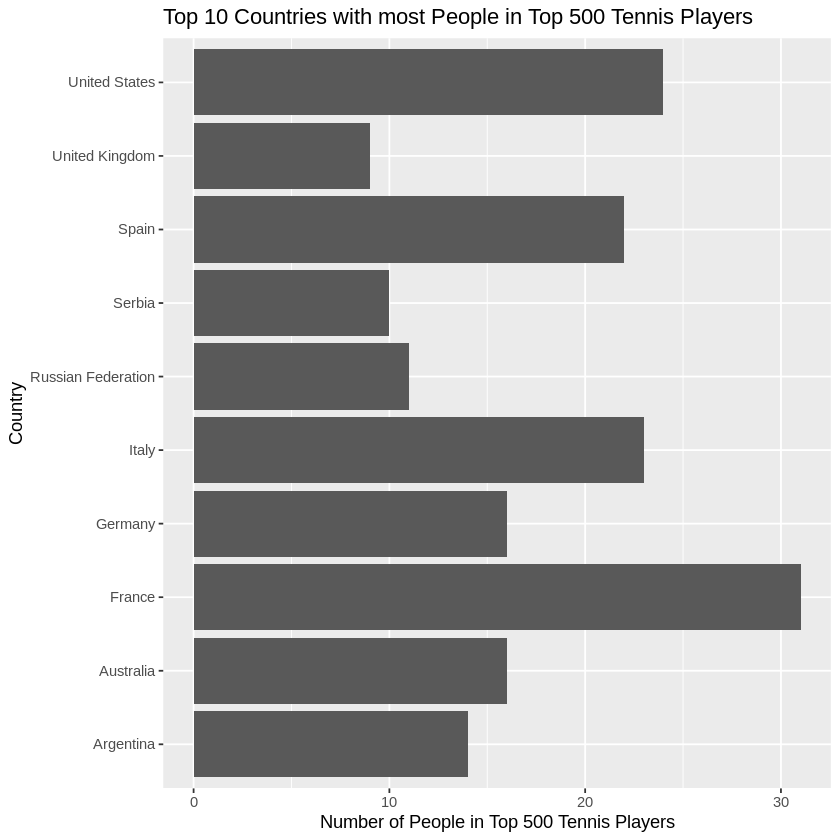

In [7]:
table1 <- training_data %>%
    group_by(Country) %>%
    summarize(avg_award = mean(Prize.Money)) 

avg_award <- table1$avg_award
    
final_table <- training_data %>%
    group_by(Country) %>%
    summarize(n = n()) %>%
    bind_cols(avg_award) %>%
    mutate(avg_award = ...3) %>%
    select(-...3)

final_table <- final_table %>%
        arrange(n)

top_10 <- tail(final_table, 10)

top_10_graph <- ggplot(top_10,aes(x = Country, y = n)) +
        geom_bar(stat = "identity") +
        labs(x = "Country", y = "Number of People in Top 500 Tennis Players") +
        ggtitle("Top 10 Countries with most People in Top 500 Tennis Players") +
        coord_flip()

tibble(final_table)

top_10_graph